# Entregável 1 - visão computacional

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


# Equalização de histograma

In [4]:
rintin = cv2.imread("RinTinTin.jpg")

In [5]:
rintin.shape

(240, 320, 3)

In [6]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [7]:
rintin_gray.shape

(240, 320)

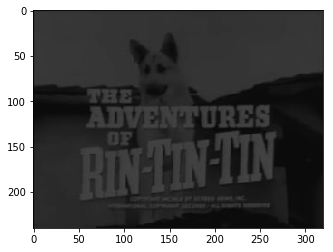

In [8]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

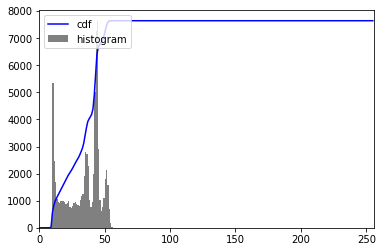

In [9]:
hist, bins = np.histogram(rintin_gray.flatten(), 256, [0 ,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(), 256, [0, 256], color = 'gray')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1. Não, já que a faixa de cor se inicia em 0 e se estende até 255 e os pixeis da imagem se iniciam em 8 e se estendem a 58

Máximo: 255


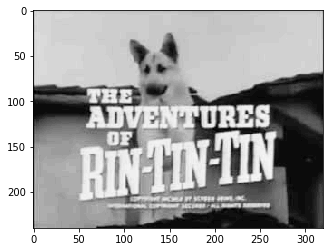

In [19]:
histo = rintin_gray
histo -= histo.min()
taxa = 255 / histo.max()
for i in range(len(histo)):
    for j in range(len(histo[0])):
        histo[i][j] *= taxa
print("Máximo: {}".format(histo.max()))

plt.imshow(rintin_gray, cmap = "Greys_r", vmin = 0, vmax = 255)

In [20]:
histo

array([[ 66, 158, 173, ..., 168, 168, 147],
       [ 71, 163, 183, ..., 173, 173, 147],
       [ 76, 168, 188, ..., 173, 178, 153],
       ..., 
       [ 30, 102, 137, ...,  51,  51,  45],
       [ 40, 107, 142, ...,  51,  45,  45],
       [ 51, 117, 153, ...,  51,  45,  45]], dtype=uint8)

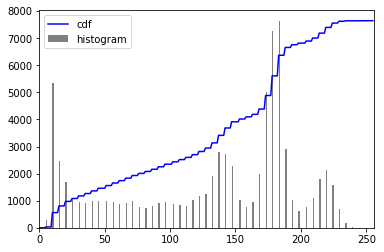

In [26]:
hist, bins = np.histogram(rintin_gray.flatten(), 256, [0 ,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(), 256, [0, 256], color = 'gray')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


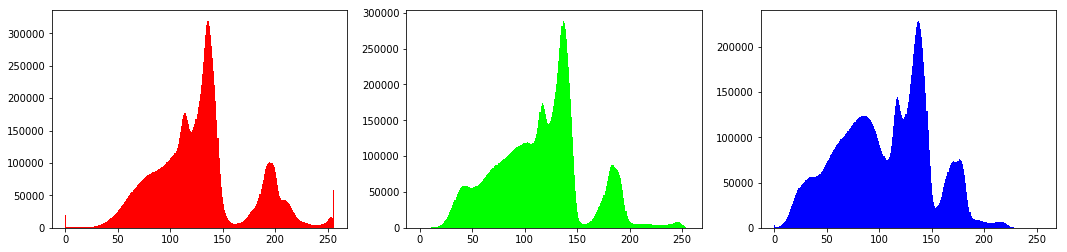

In [31]:
boxes = cv2.imread("hall_box_battery1.jpg")
boxes = cv2.cvtColor(boxes, cv2.COLOR_BGR2RGBA)

hist,bins = np.histogram(boxes.flatten(), 256, [0, 256])

fig, ax = plt.subplots(1, 3, figsize = (18,4))
ax[0].hist(boxes[:,:,0].flatten(),256,[0,256], color = "#ff0000")
ax[1].hist(boxes[:,:,1].flatten(),256,[0,256], color = "#00ff00")
ax[2].hist(boxes[:,:,2].flatten(),256,[0,256], color = "#0000ff")
plt.show()

1. Não com certeza, tão menos facilmente, alguns pontos podem gerar certa confusão e duvida

In [23]:
boxes = cv2.imread("hall_box_battery1.jpg")
boxes = cv2.cvtColor(boxes, cv2.COLOR_BGR2HSV)

In [24]:
def findRED(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i, j, 0] < 7 and img[i, j, 0] > 0:
                img[i, j] = [255, 255, 255]
            else:
                img[i, j] = [0, 0, 0]
    return img

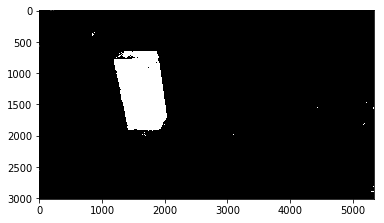

In [25]:
plt.imshow(findRED(boxes), vmin = 0, vmax = 255)